In [ ]:
%pip install mplhep hist pip seaborn atlas-ftag-tools --upgrade

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 0.23ubuntu1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [ ]:
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import seaborn as sns
import hist
from hist import Hist

In [4]:
input_path = "/nfs/dust/atlas/user/pgadow/plit/data/ntuples/user.pgadow.LD_2023_11_28.601589.PhPy8EG_A14_ttbar_hdamp258p75_nonallhadron.e8547_s3797_r13144_p5934_TREE/user.pgadow.35693775._000477.output.h5"

with h5py.File(input_path, "r") as f:
    muons_data = f["muons"][:]
    muons_df = pd.DataFrame(muons_data)

In [5]:
pd.set_option('display.max_columns', None)
muons_df.head()

,pt,eta,phi,pt_track,eta_track,phi_track,ptvarcone30Rel,ptvarcone30TTVARel,topoetcone30Rel,topoetcone40Rel,caloClusterERel,ptfrac_track,ptfrac_lepton,ptrel_track,ptrel_lepton,dRtrackjet_track,dRtrackjet_lepton,nTracksTrackjet,iffClass,muonType,eventNumber
0,16492.773438,-1.741837,1.770113,16492.773438,-1.741837,1.770113,0.119260,0.261047,1.905950,1.964215,-99.0,2.336237,2.336237,497.236542,497.236725,0.092126,0.092126,5.0,1,0,470586074
1,5810.083008,1.756852,1.518555,5810.083008,1.756852,1.518555,0.000000,0.000000,-0.024909,0.084420,-99.0,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.0,1,3,470587197
2,16026.982422,-1.469026,-0.714944,16026.982422,-1.469026,-0.714944,0.000000,0.043947,0.134944,0.049003,-99.0,0.946863,0.946863,54.741261,54.741322,0.007806,0.007806,2.0,4,0,470544351
3,8018.823730,-0.081225,1.313224,8018.823730,-0.081225,1.313224,1.605956,1.605956,2.233128,5.494512,-99.0,0.365294,0.365294,602.136230,602.136230,0.075250,0.075250,7.0,1,3,470546613
4,6542.669434,-0.396530,1.551216,6542.669434,-0.396530,1.551216,1.500223,1.500223,3.623168,4.040854,-99.0,0.400638,0.400638,317.660461,317.660522,0.052703,0.052703,4.0,1,0,470546613


/home/pgadow/.local/lib/python3.8/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in scalar divide
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/home/pgadow/.local/lib/python3.8/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/home/pgadow/.local/lib/python3.8/site-packages/mplhep/utils.py:242: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/home/pgadow/.local/lib/python3.8/site-packages/mplhep/utils.py:243: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/home/pgadow/.local/lib/python3.8/site-packages/mplhep/utils.py:244: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale
/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/usr/l

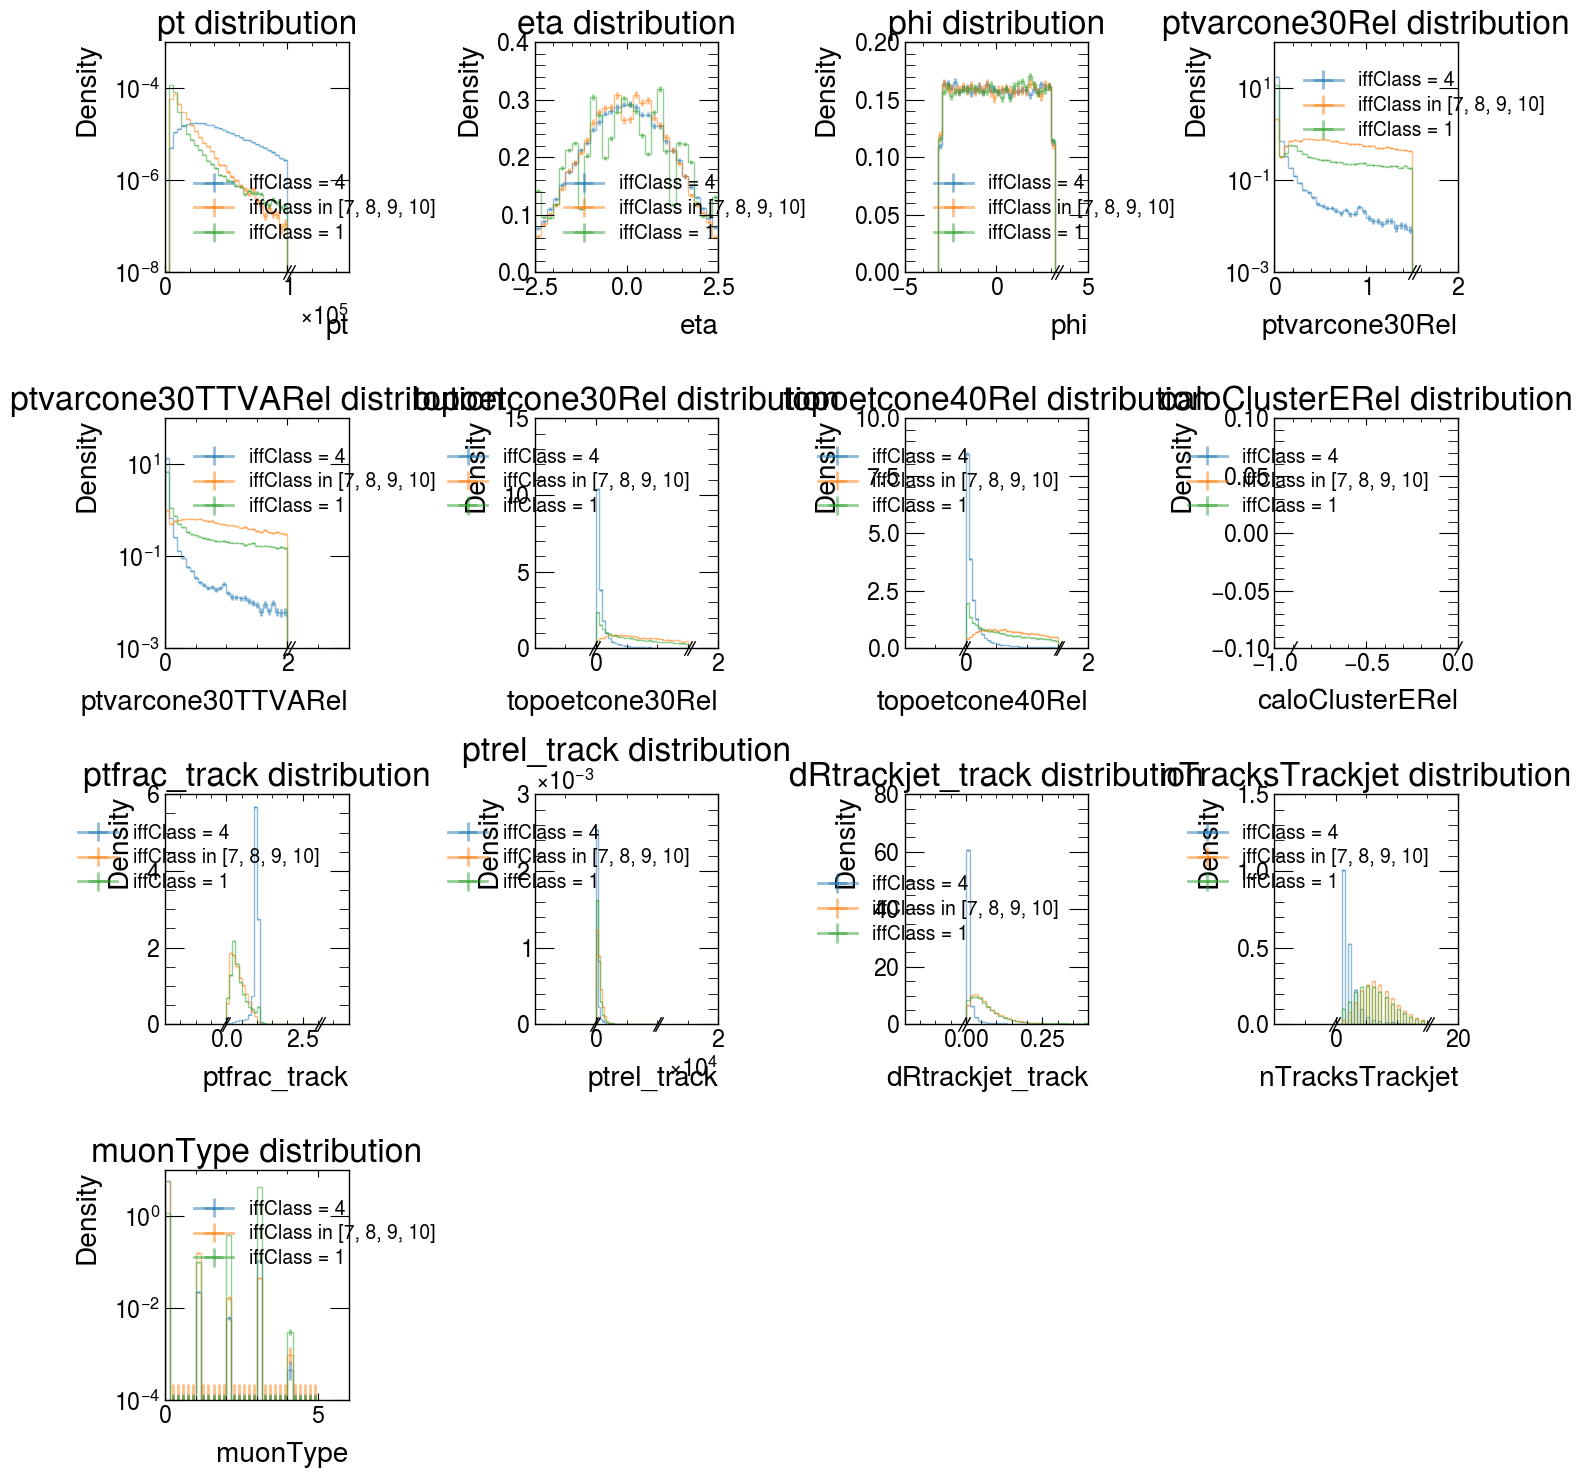

In [11]:
# Set the style to ATLAS (you can change this to 'CMS' or 'ALICE' if you prefer)
hep.style.use("ATLAS")

# Filter data by iffClass values
filtered_muons_df = muons_df[muons_df["iffClass"].isin([1, 4, 7, 8, 9, 10])]

# Plot the distributions for each column based on 'iffClass' value
iff_classes_to_plot = [4, [7, 8, 9, 10], 1]
labels = ["iffClass = 4", "iffClass in [7, 8, 9, 10]", "iffClass = 1"]

custom_bin_edges = {
    "pt": [0, 100_000],
    "eta": [-2.5, 2.5],
    "phi": [-3.2, 3.2],
    "pt_track": [0, 100_000],
    "eta_track": [-2.5, 2.5],
    "phi_track": [-3.2, 3.2],
    "ptvarcone30Rel": [0, 1.5],
    "ptvarcone30TTVARel": [0, 2],
    "topoetcone30Rel": [0, 1.5],
    "topoetcone40Rel": [0, 1.5],
    "caloClusterERel": [0, 30],
    "ptfrac_track": [0, 3],
    "ptfrac_lepton": [0, 3],
    "ptrel_track": [0, 10_000],
    "ptrel_lepton": [0, 10_000],
    "dRtrackjet_track": [0, 0.4],
    "dRtrackjet_lepton": [0, 0.4],
    "nTracksTrackjet": [0, 15],
    "muonType": [0, 5],
    # ... add more columns and their bin edges as needed
}

log_y = {
    "pt": True,
    "eta": False,
    "phi": False,
    "pt_track": [0, 100_000],
    "eta_track": False,
    "phi_track": False,
    "ptvarcone30Rel": True,
    "ptvarcone30TTVARel": True,
    "topoetcone30Rel": False,
    "topoetcone40Rel": False,
    "caloClusterERel": False,
    "ptfrac_track": False,
    "ptfrac_lepton": False,
    "ptrel_track": False,
    "ptrel_lepton": False,
    "dRtrackjet_track": False,
    "dRtrackjet_lepton": False,
    "nTracksTrackjet": False,
    "muonType": True,
    # ... add more columns and their bin edges as needed
}

veto = ["iffClass", "eventNumber", "pt_track", "eta_track", "phi_track", "ptfrac_lepton", "ptrel_lepton", "dRtrackjet_lepton"]


def compute_bin_edges(value):
    """Compute bin edges based on custom_bin_edges values."""
    if isinstance(value, tuple) and len(value) == 3:
        num_bins, bin_low, bin_high = value
        return list(np.linspace(bin_low, bin_high, num_bins + 1))
    else:
        return value


# Determine the grid layout based on the number of columns to plot
num_cols_to_plot = len(filtered_muons_df.columns) - len(veto)
num_rows = int(np.ceil(np.sqrt(num_cols_to_plot)))
num_cols = int(np.ceil(num_cols_to_plot / num_rows))

# Create a single figure and grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# If there's only one row or one column, axes is a 1D array and we convert it to 2D for consistency
if num_rows == 1:
    axes = axes.reshape(1, -1)
if num_cols == 1:
    axes = axes.reshape(-1, 1)

# Plot the distributions for each column in the grid
for idx, column in enumerate([col for col in filtered_muons_df.columns if col not in veto]):
    ax = axes[idx // num_cols, idx % num_cols]
    
    bin_edges = custom_bin_edges[column]
    
    hists = []
    
    for classes, label in zip(iff_classes_to_plot, labels):
        if isinstance(classes, list):
            subset = filtered_muons_df[filtered_muons_df["iffClass"].isin(classes)]
        else:
            subset = filtered_muons_df[filtered_muons_df["iffClass"] == classes]

        # Create histogram using hist library with the custom binning
        h = Hist(hist.axis.Regular(30, bin_edges[0], bin_edges[-1], name=column, label=column))
        h.fill(subset[column].to_numpy())
        hists.append(h)
    
    hep.histplot(hists, ax=ax, label=labels, density=True, stack=False, histtype="step", alpha=0.5)
    if log_y[column]: ax.set_yscale("log")
    
    ax.set_title(f"{column} distribution")
    ax.set_xlabel(column)
    ax.set_ylabel("Density")
    ax.legend()

# If there are more subplot axes than columns, remove the extras
if num_cols_to_plot < num_rows * num_cols:
    for j in range(num_cols_to_plot, num_rows * num_cols):
        fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

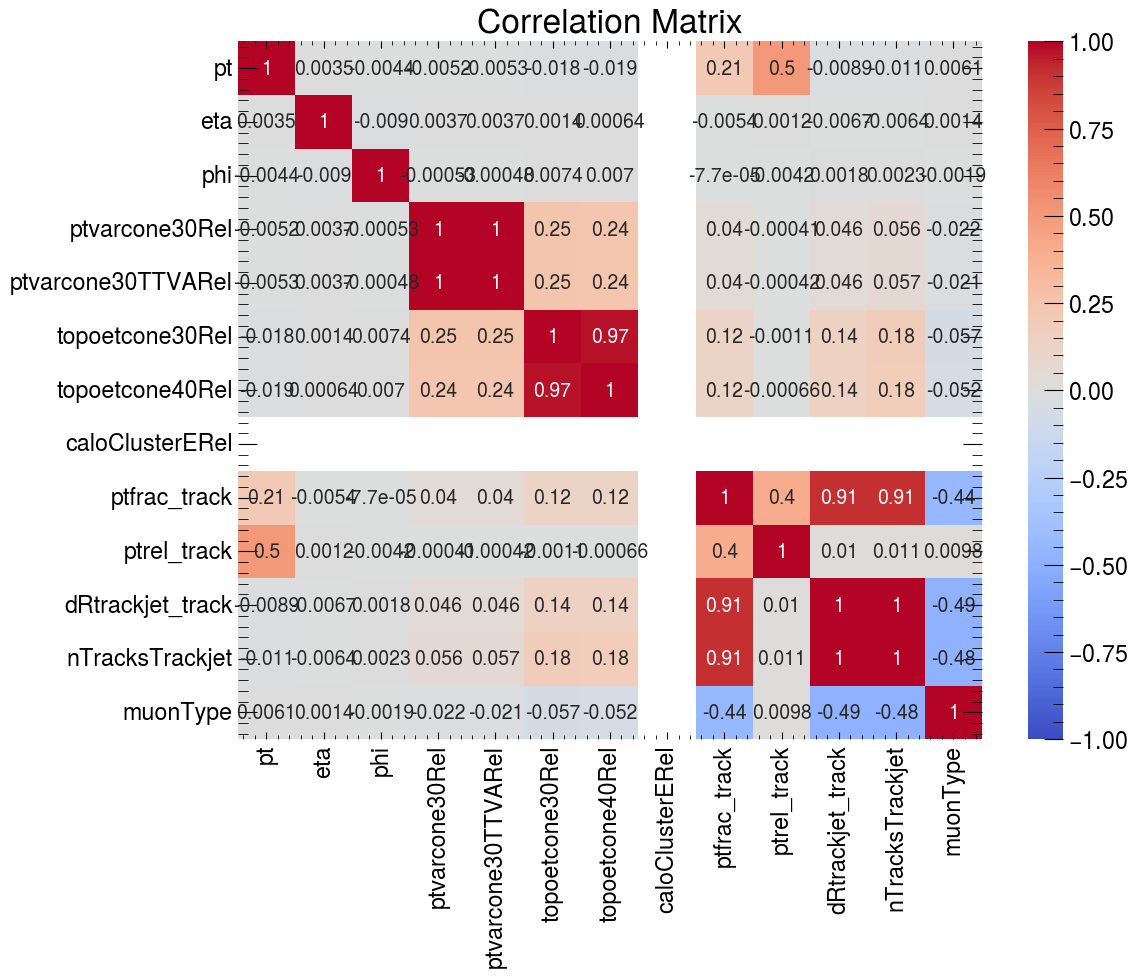

In [7]:
# Compute the correlation matrix
correlation_matrix = filtered_muons_df[[col for col in filtered_muons_df.columns if col not in veto]].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()